In [4]:

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [5]:
glass_df = pd.read_csv(r'..\Cases\Glass Identification\Glass.csv')
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [13]:
X= glass_df.drop(columns=['Type'])
y= glass_df['Type']
type(y)

pandas.core.series.Series

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

0.6615384615384615

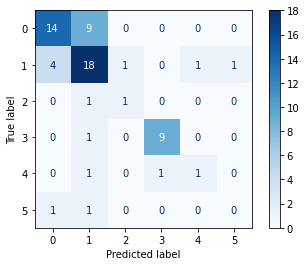

In [17]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
accuracy_score(y_test,y_pred)

In [18]:
lr.coef_,lr.intercept_

(array([[-1.34451117e-02, -6.73494899e-01,  1.55583877e+00,
         -1.46751549e+00,  5.20514719e-02, -4.38526528e-01,
          4.72140253e-01, -1.51618117e-01, -2.39459690e-01],
        [ 3.69717824e-02, -5.15495893e-01,  4.97544340e-01,
          2.72218610e-01,  4.56681433e-02,  4.29537646e-01,
          3.77105018e-01,  3.88887796e-01,  4.19437739e-01],
        [ 2.25440920e-02, -7.62756084e-01, -6.67437406e-01,
          1.79556471e+00,  8.91650223e-02,  1.01238898e+00,
          2.14741175e-01, -1.61697423e-01, -2.80998736e-02],
        [-1.31270675e-02,  3.65420746e-01, -1.73738165e+00,
          5.20461833e-01,  8.61802764e-02,  2.80089768e-01,
         -9.54225411e-01,  9.32477371e-01, -8.11312234e-02],
        [-3.44921073e-02,  1.28557242e+00, -8.50707963e-01,
         -3.53475537e-01, -1.67774171e-01, -8.46304412e-01,
         -3.06617566e-01, -7.37547814e-01, -9.22799416e-02],
        [ 1.54841208e-03,  3.00753708e-01,  1.20214390e+00,
         -7.67254132e-01, -1.052907

### inferencing

In [20]:
test_glass = pd.read_csv(r'..\Cases\Glass Identification\tst_Glass.csv')
test_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.5321,14.0,0.00,0.34,70.23,0.001,6.7,1.23,0.000
1,1.5212,15.0,3.00,1.23,75.90,0.100,7.0,0.00,0.440
2,1.5112,13.0,3.50,2.30,73.00,3.400,14.0,2.30,0.220
3,1.5000,12.4,1.23,3.22,74.22,4.500,10.0,3.10,0.100
4,1.5200,13.0,2.40,0.34,71.22,3.200,9.0,1.44,0.001


In [21]:
y_test_pred=lr.predict(test_glass)
y_test_pred

array(['headlamps', 'tableware', 'building_windows_non_float_processed',
       'containers', 'building_windows_non_float_processed', 'headlamps'],
      dtype=object)